In [1]:
# Import util modules

from numpy import *
import matplotlib.pyplot as plt
from LRFutils import progress
from LRFutils import archive
from numba import njit

In [2]:
# Import program classes

from classes.layer import Layer
from classes.island import Island
from classes.monomer import Monomer

In [3]:
# import program modules

import simulation
import animation
import data

---

# Config

In [4]:
L = 25 # Size of the grid
D1 = 1e4 # Diffusion coefficient [s-1]
F = 1e4 # linspace(5e-6,1e4,1000,endpoint=True) # Flux [s-1]

# Starting monomers
N = 0 # L**2 / 100

steps = 1000

---

# Class definition

In [5]:
layer = Layer(L)
evolution = []
monomers = []
free_monomers = []
stuck_monomers = []
occuped_space = []
islands = []
stepline = arange(0,steps)

# Base monomers (N monomers present at the begining of the simulation)
for _ in range(N):
    monomer = Monomer(layer)

# Generating evolution<
pbar = progress.Bar(max=steps, prefix="Simulating evolution")
for i in stepline:
    new_state = simulation.run_step(layer, F, D1)
    evolution.append(new_state)
    monomers.append(len(Monomer.all))
    free_monomers.append(len(Monomer.get_free_monomers()))
    stuck_monomers.append(len(Monomer.get_monomers_in_island()))
    occuped_space.append(sum(new_state > 0))
    islands.append(len(Island.all))
    data.record()
    pbar(i+1)


desc = archive.description(L=L, D1=D1, F=F)
path = archive.new(desc)
print(f"Results saved in {path}")
savez_compressed(f"{path}/Evolution.npy")

Simulating evolution ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1000/1000 0:00:03eta 0:00:00
Results saved in ./archives/2022-10-20_82de084/10_L=25,D1=10000.0,F=10000.0


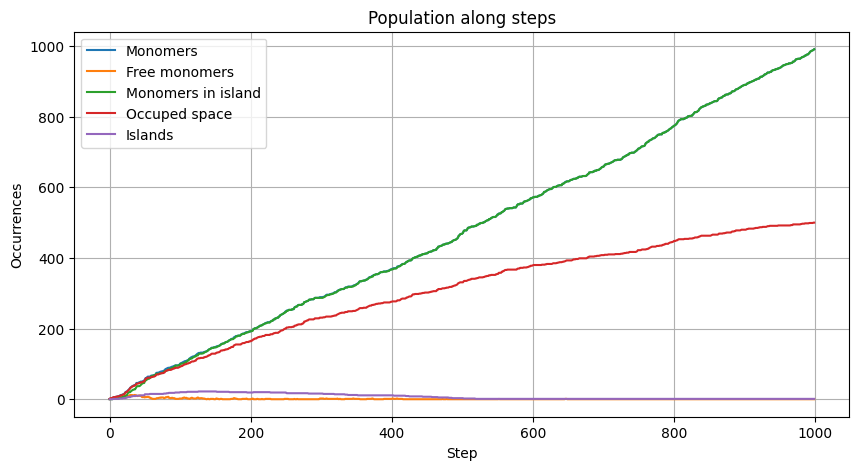

In [6]:
# Plotting results

plt.figure(figsize=(10,5))
plt.plot(stepline, monomers, label="Monomers")
plt.plot(stepline, free_monomers, label="Free monomers")
plt.plot(stepline, stuck_monomers, label="Monomers in island")
plt.plot(stepline, occuped_space, label="Occuped space")
plt.plot(stepline, islands, label="Islands")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Occurrences")
plt.title("Population along steps")
plt.grid()
plt.savefig(f"{path}/Population.png")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


Generating animation ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1000/1000 0:05:44eta 0:00:00


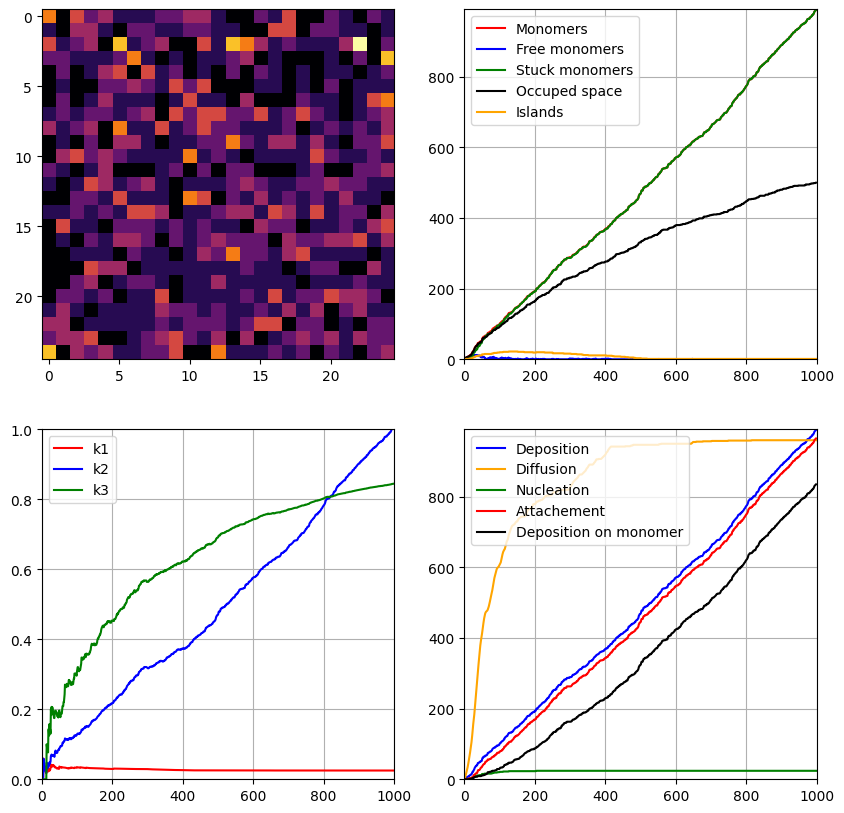

In [7]:
# Generating animation

animation.generate(evolution, monomers, free_monomers, stuck_monomers, islands, occuped_space, save_as = f"{path}/Evolution.gif", plot=False, verbose = False)